In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.dropna(axis=1,inplace=True)

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Gender             0
Tenure             0
Balance            0
NumOfProducts      0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(2)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop('RowNumber', axis=1, inplace=True)

In [13]:
df.drop('Surname',axis=1, inplace=True)

In [14]:
df.head()

,CustomerId,CreditScore,Gender,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,15634602,619,Female,2,0.00,1,101348.88,1
1,15647311,608,Female,1,83807.86,1,112542.58,0
2,15619304,502,Female,8,159660.80,3,113931.57,1
3,15701354,699,Female,1,0.00,2,93826.63,0
4,15737888,850,Female,2,125510.82,1,79084.10,0


In [15]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
df['Gender'].replace({
    'Female':0,
    'Male':1
},inplace=True)

C:\Users\tejas\AppData\Local\Temp\ipykernel_23160\271187781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({
C:\Users\tejas\AppData\Local\Temp\ipykernel_23160\271187781.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({


In [17]:
df.head()

,CustomerId,CreditScore,Gender,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,15634602,619,0,2,0.00,1,101348.88,1
1,15647311,608,0,1,83807.86,1,112542.58,0
2,15619304,502,0,8,159660.80,3,113931.57,1
3,15701354,699,0,1,0.00,2,93826.63,0
4,15737888,850,0,2,125510.82,1,79084.10,0


In [18]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [19]:
x

,CustomerId,CreditScore,Gender,Tenure,Balance,NumOfProducts,EstimatedSalary
0,15634602,619,0,2,0.00,1,101348.88
1,15647311,608,0,1,83807.86,1,112542.58
2,15619304,502,0,8,159660.80,3,113931.57
3,15701354,699,0,1,0.00,2,93826.63
4,15737888,850,0,2,125510.82,1,79084.10
...,...,...,...,...,...,...,...
9995,15606229,771,1,5,0.00,2,96270.64
9996,15569892,516,1,10,57369.61,1,101699.77
9997,15584532,709,0,7,0.00,1,42085.58
9998,15682355,772,1,3,75075.31,2,92888.52


In [20]:
y

0        1
1        0
2        1
3        0
4        0
        ..
9995     0
9996     0
9997     1
9998     1
10000    0
Name: Exited, Length: 10000, dtype: int64

In [21]:
# Cross Validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


In [23]:
# Training
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred = model.predict(x_test)

In [25]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8176
F1 Score:  0.3006134969325153
Confusion Matrix: 
 [[1946   57]
 [ 399   98]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      2003
           1       0.63      0.20      0.30       497

    accuracy                           0.82      2500
   macro avg       0.73      0.58      0.60      2500
weighted avg       0.79      0.82      0.78      2500



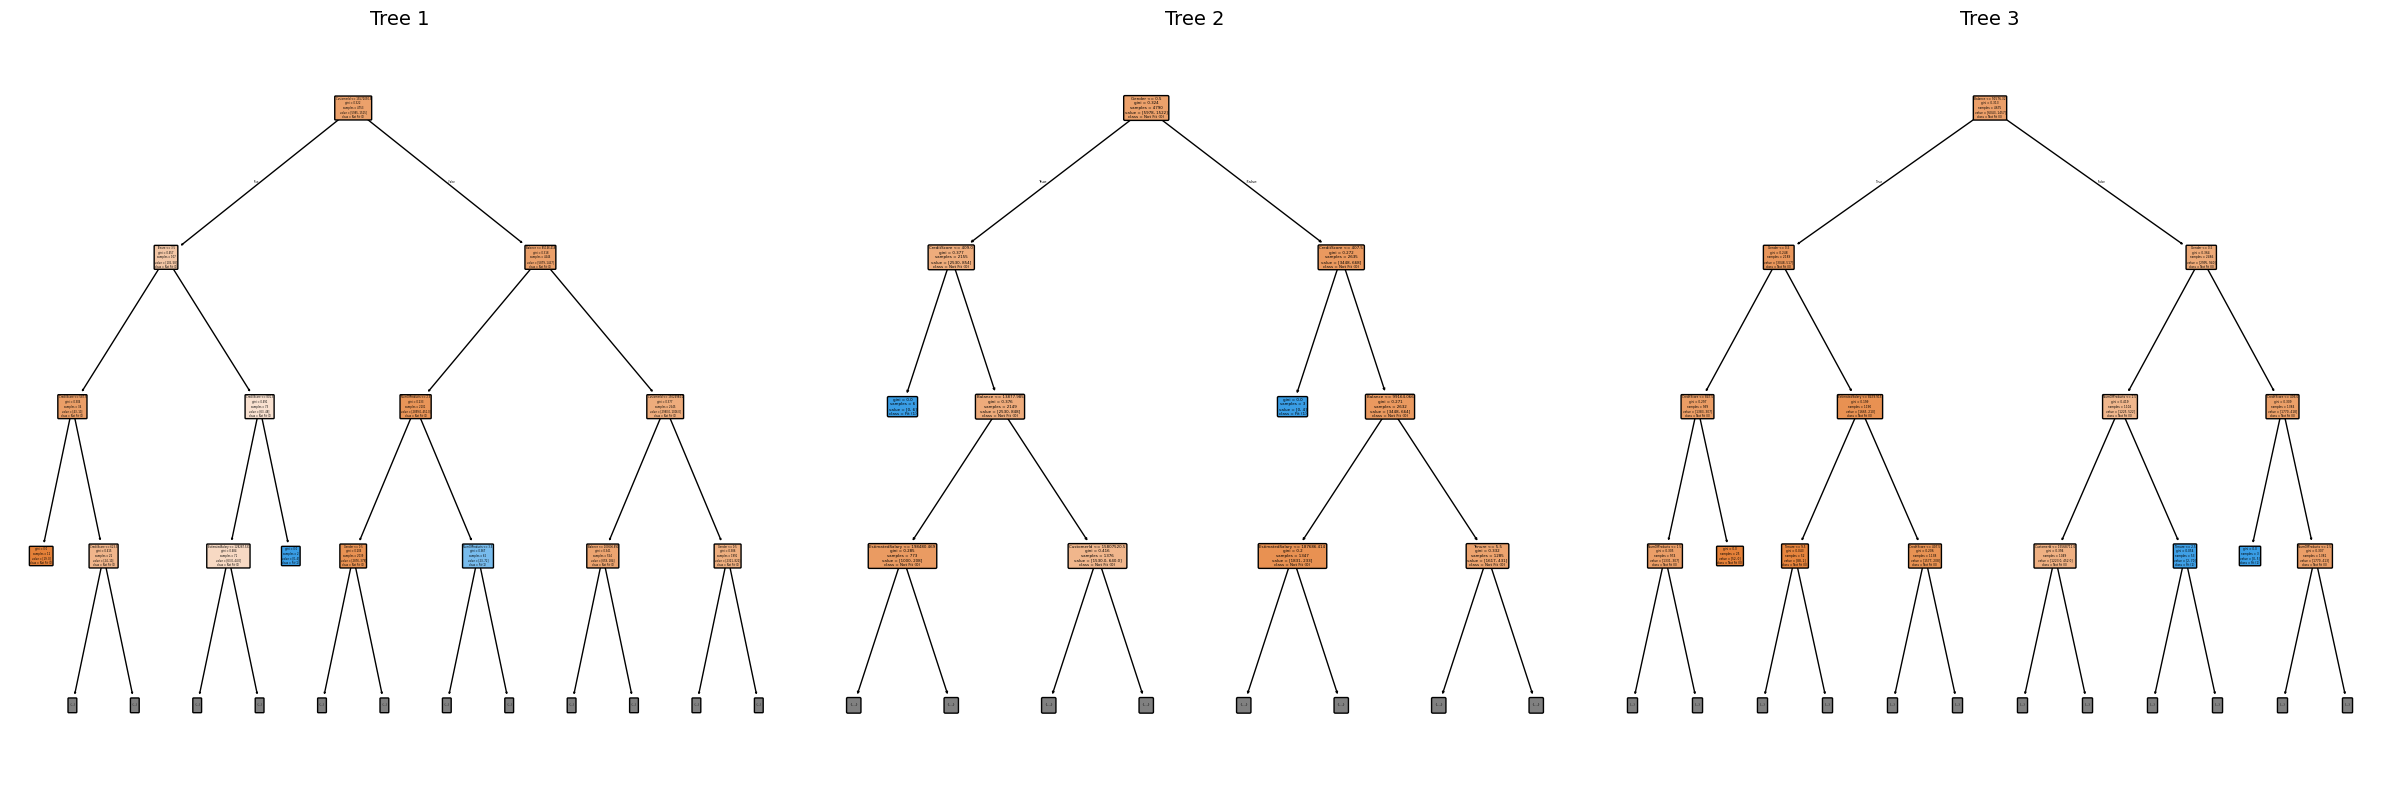

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

n_trees = 3

fig, axes = plt.subplots(1, n_trees, figsize=(24, 8))

for i in range(n_trees):
    plot_tree(
        model.estimators_[i],
        feature_names=x_train.columns,
        class_names=['Not Fit (0)', 'Fit (1)'],
        filled=True,
        rounded=True,
        max_depth=3,       
        ax=axes[i]
    )
    axes[i].set_title(f"Tree {i+1}", fontsize=14)

plt.tight_layout()
plt.show()
